In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
import pandas as pd
from ultralytics import YOLO
import numpy as np
import cv2
import os
from collections import Counter

# Load pre-trained YOLOv8n model
model = YOLO("yolov8n.pt")  # you can try 'yolov8s.pt' for better accuracy


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import torch
print("CUDA available:", torch.cuda.is_available())

CUDA available: False


In [ ]:
from google.colab import files

# Upload an image
uploaded = files.upload()  # Choose one image (JPG/PNG)
image_path = next(iter(uploaded))  # Get uploaded image filename


Saving Traffic.jpeg to Traffic.jpeg


In [ ]:
# Run prediction on the uploaded image
results = model.predict(source=image_path, conf=0.4, save=True)

# Get the output image path
import glob
output_path = glob.glob('runs/detect/predict/*.jpg')[0]



image 1/1 /content/Traffic.jpeg: 480x640 6 persons, 3 cars, 404.6ms
Speed: 12.2ms preprocess, 404.6ms inference, 30.2ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict


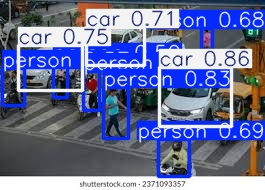

In [ ]:
from IPython.display import Image, display
display(Image(filename=output_path))


In [18]:
from google.colab import files

# Upload an image
uploaded = files.upload()  # Choose one image (JPG/PNG)
image_path = next(iter(uploaded))  # Get uploaded image filename


Saving Parking(1).webp to Parking(1).webp


In [19]:
results = model.predict(source=image_path, conf=0.4, save=True)

# Get the output image path
import glob
output_path = glob.glob('runs/detect/predict/*.jpg')[0]


image 1/1 /content/Parking(1).webp: 384x640 20 cars, 2 buss, 150.0ms
Speed: 4.1ms preprocess, 150.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict3



image 1/1 /content/Parking(1).webp: 384x640 25 cars, 2 buss, 138.9ms
Speed: 3.4ms preprocess, 138.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Detected Objects:
Car: 25
Bus: 2


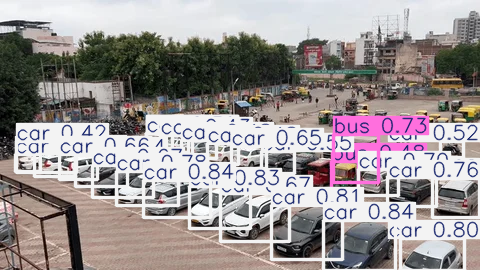

In [20]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

# Load model
model = YOLO("yolov8n.pt")  # Or your custom model like "best.pt"

# Inference on image
results = model(image_path)[0]  # Run and take first result

# Dictionary to count each class
object_counts = {}

# Loop over detections
for box in results.boxes:
    cls_id = int(box.cls[0])  # Class index
    class_name = model.names[cls_id]  # Get class name from model
    object_counts[class_name] = object_counts.get(class_name, 0) + 1

# Print counts individually
print("Detected Objects:")
for obj, count in object_counts.items():
    print(f"{obj.capitalize()}: {count}")

# Display the annotated image
annotated = results.plot()
cv2_imshow(annotated)